# 3. Clumps: Get Sub-Regions of The Loaded Data

## Load the Data

In [1]:
using Mera, PyPlot
info = getinfo(400, "../../testing/simulations/manu_sim_sf_L14")
clumps = getclumps(info);

┌ Info: Precompiling Mera [02f895e8-fdb1-4346-8fe6-c721699f5126]
└ @ Base loading.jl:1273



*__   __ _______ ______   _______ 
|  |_|  |       |    _ | |   _   |
|       |    ___|   | || |  |_|  |
|       |   |___|   |_||_|       |
|       |    ___|    __  |       |
| ||_|| |   |___|   |  | |   _   |
|_|   |_|_______|___|  |_|__| |__|

[Mera]: 2020-01-28T18:19:29.738

Code: RAMSES
output [400] summary:
mtime: 2018-09-05T09:51:55.041
ctime: 2019-11-01T17:35:21.051
simulation time: 594.98 [Myr]
boxlen: 48.0 [kpc]
ncpu: 2048
ndim: 3
-------------------------------------------------------
amr:           true
level(s): 6 - 14 --> cellsize(s): 750.0 [pc] - 2.93 [pc]
-------------------------------------------------------
hydro:         true
hydro-variables:  7  --> (:rho, :vx, :vy, :vz, :p, :var6, :var7)
hydro-descriptor: (:density, :velocity_x, :velocity_y, :velocity_z, :thermal_pressure, :passive_scalar_1, :passive_scalar_2)
γ: 1.6667
-------------------------------------------------------
gravity:       true
gravity-variables: (:epot, :ax, :ay, :az)
----------------------------

## Cuboid Region

### Create scatter plots of the full box:
Use the *getvar* function to extract the positions of the clumps relative to the box center. It returns a dictionary of arrays:

In [2]:
positions = getvar(clumps, [:x, :y, :z], :kpc, center=[:boxcenter], center_unit=:kpc) # units=[:kpc, :kpc, :kpc]
x, y, z = positions[:x], positions[:y], positions[:z]; # assign the three components of the dictionary to three arrays

Alternatively, use the *getposition* function to extract the positions of the clumps. It returns a tuple of the three components:

In [3]:
x, y, z = getpositions(clumps, :kpc, center=[:boxcenter], center_unit=:kpc); # assign the three components of the tuple to three arrays

Get the extent of the processed domain with respect to a given center. The returned tuple is useful declare the specific range of the plots. 

In [4]:
rx, ry, rz = getextent(clumps, :kpc,  center=[:boxcenter]);

#### Cuboid Region: The red lines show the region that we want to cut-out as a sub-region from the full data:

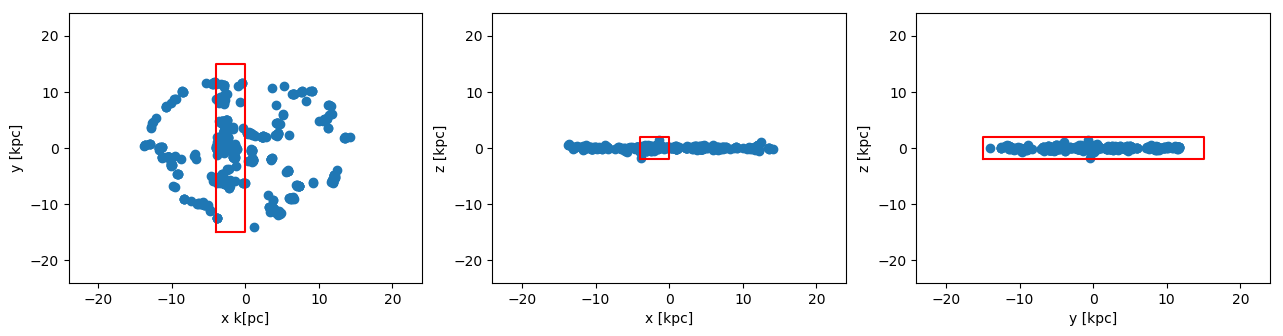

In [5]:
figure(figsize=(15.5, 3.5))

subplot(1,3,1)
scatter(x,y)
plot([-4.,0.,0.,-4.,-4.],[-15.,-15.,15.,15.,-15.], color="red")
xlim(rx)
ylim(ry)
xlabel("x k[pc]")
ylabel("y [kpc]")


subplot(1,3,2)
scatter(x,z)
plot([-4.,0.,0.,-4.,-4.],[-2.,-2.,2.,2.,-2.], color="red")
xlim(rx)
ylim(rz)
xlabel("x [kpc]")
ylabel("z [kpc]")


subplot(1,3,3)
scatter(y,z)
plot([-15.,15.,15.,-15.,-15.],[-2.,-2.,2.,2.,-2.], color="red")
xlim(ry)
ylim(rz)
xlabel("y [kpc]")
ylabel("z [kpc]");

#### Cuboid Region: Cutout the data assigned to the object *clumps*

Note: The selected regions can be given relative to a user given center or to the box corner [0., 0., 0.] by default. The user can choose between standard notation [0:1] (default) or physical length-units, defined in e.g. info.scale :

In [6]:
clumps_subregion = subregion( clumps, :cuboid,
                                    xrange=[-4., 0.], 
                                    yrange=[-15. ,15.], 
                                    zrange=[-2. ,2.],
                                    center=[:boxcenter],
                                    range_unit=:kpc);

[Mera]: 2020-01-28T17:57:12.264

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.4166667 :: 0.5  	==> 20.0 [kpc] :: 24.0 [kpc]
ymin::ymax: 0.1875 :: 0.8125  	==> 9.0 [kpc] :: 39.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Memory used for data table :29.52734375 KB
-------------------------------------------------------



The function *subregion* creates a new object with the same type as the object created by the function *getclumps* :

In [7]:
typeof(clumps_subregion)

ClumpDataType

#### Cuboid Region: Scatter-Plots of the sub-region. 
The coordinates center is the center of the box by default:

In [8]:
x, y, z    = getpositions(clumps_subregion, :kpc, center=[:boxcenter]); # clump positions of the subregion
rx, ry, rz = getextent(clumps, :kpc, center=[:boxcenter] ); # extent of the box

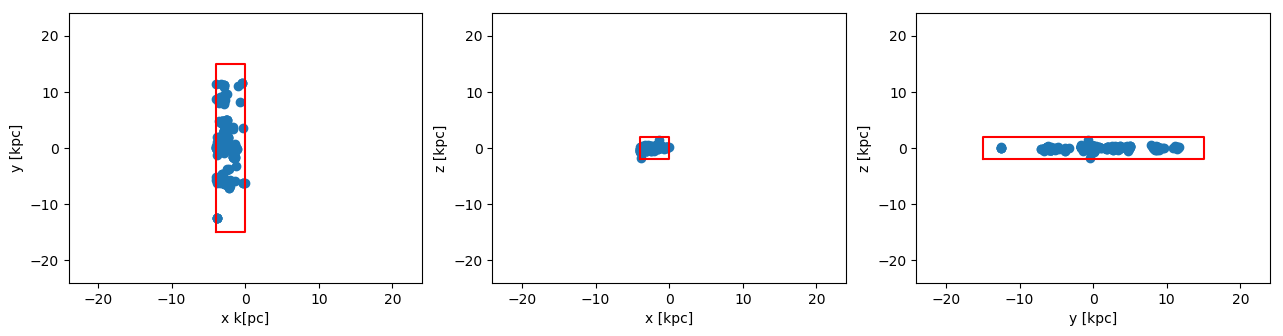

In [9]:
figure(figsize=(15.5, 3.5))

subplot(1,3,1)
scatter(x,y)
plot([-4.,0.,0.,-4.,-4.],[-15.,-15.,15.,15.,-15.], color="red")
xlim(rx)
ylim(ry)
xlabel("x k[pc]")
ylabel("y [kpc]")


subplot(1,3,2)
scatter(x,z)
plot([-4.,0.,0.,-4.,-4.],[-2.,-2.,2.,2.,-2.], color="red")
xlim(rx)
ylim(rz)
xlabel("x [kpc]")
ylabel("z [kpc]")


subplot(1,3,3)
scatter(y,z)
plot([-15.,15.,15.,-15.,-15.],[-2.,-2.,2.,2.,-2.], color="red")
xlim(ry)
ylim(rz)
xlabel("y [kpc]")
ylabel("z [kpc]");

#### Cuboid Region: Get the extent of the subregion data ranges

In [10]:
rx_sub, ry_sub, rz_sub = getextent(clumps_subregion, :kpc, center=[:boxcenter]); # extent of the subregion

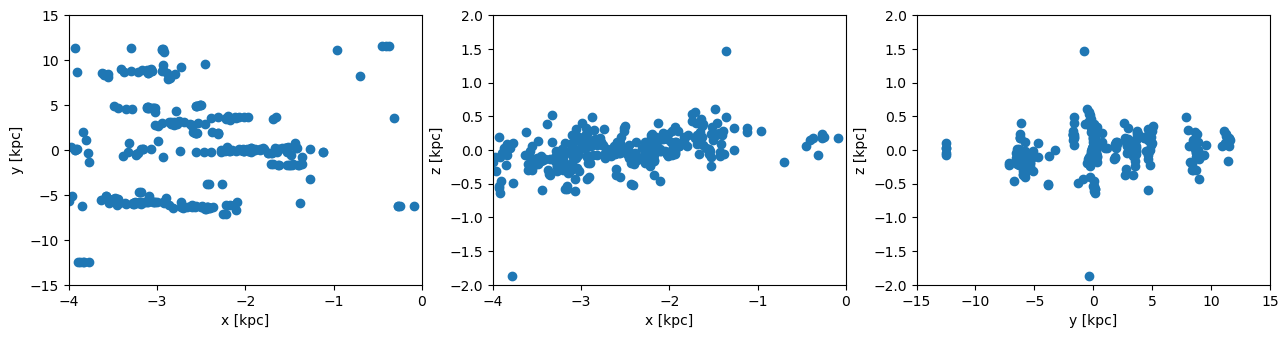

In [19]:
figure(figsize=(15.5, 3.5))

subplot(1,3,1)
scatter(x,y)
xlim(rx_sub)
ylim(ry_sub)
xlabel("x [kpc]")
ylabel("y [kpc]")


subplot(1,3,2)
scatter(x,z)
xlim(rx_sub)
ylim(rz_sub)
xlabel("x [kpc]")
ylabel("z [kpc]")


subplot(1,3,3)
scatter(y,z)
xlim(ry_sub)
ylim(rz_sub)
xlabel("y [kpc]")
ylabel("z [kpc]");

#### Cuboid Region: Get the data outside of the selected region (inverse selection):

In [11]:
clumps_subregion = subregion( clumps, :cuboid,
                                    xrange=[-4., 0.], 
                                    yrange=[-15. ,15.], 
                                    zrange=[-2. ,2.],
                                    center=[:boxcenter],
                                    range_unit=:kpc,
                                    inverse=true);

[Mera]: 2020-01-28T17:57:15.35

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.4166667 :: 0.5  	==> 20.0 [kpc] :: 24.0 [kpc]
ymin::ymax: 0.1875 :: 0.8125  	==> 9.0 [kpc] :: 39.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Memory used for data table :33.65234375 KB
-------------------------------------------------------



In [12]:
x, y, z    = getpositions(clumps_subregion, :kpc, center=[:boxcenter]);
rx_sub, ry_sub, rz_sub = getextent(clumps_subregion, :kpc, center=[:boxcenter]);

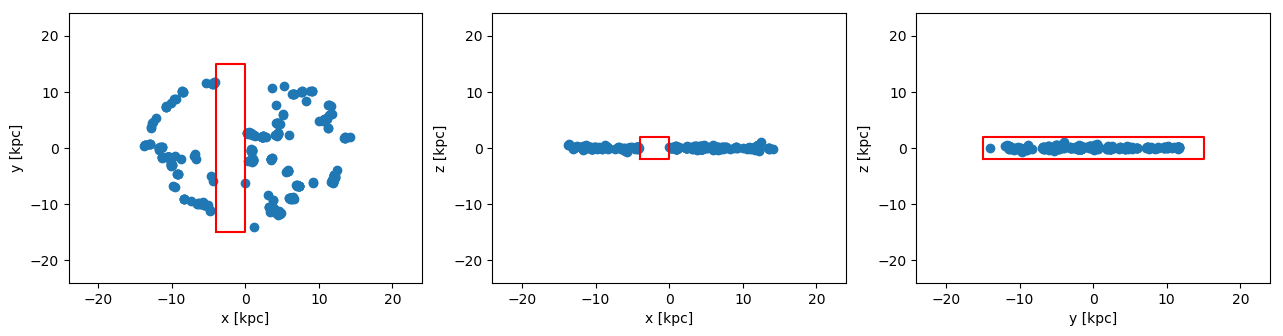

In [13]:
figure(figsize=(15.5, 3.5))

subplot(1,3,1)
scatter(x,y)
plot([-4.,0.,0.,-4.,-4.],[-15.,-15.,15.,15.,-15.], color="red")
xlim(rx_sub)
ylim(ry_sub)
xlabel("x [kpc]")
ylabel("y [kpc]")


subplot(1,3,2)
scatter(x,z)
plot([-4.,0.,0.,-4.,-4.],[-2.,-2.,2.,2.,-2.], color="red")
xlim(rx_sub)
ylim(rz_sub)
xlabel("x [kpc]")
ylabel("z [kpc]")


subplot(1,3,3)
scatter(y,z)
plot([-15.,15.,15.,-15.,-15.],[-2.,-2.,2.,2.,-2.], color="red")
xlim(ry_sub)
ylim(rz_sub)
xlabel("y [kpc]")
ylabel("z [kpc]");

## Cylindrical Region

Extract the the clump positions and the extent of the full box:

In [14]:
clumps  = getclumps(info);
x, y, z = getpositions(clumps, :kpc, center=[:boxcenter]);
rx, ry, rz = getextent(clumps, :kpc, center=[:boxcenter]);

[Mera]: Get clump data: 2020-01-28T17:57:15.976

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]

Read 12 colums: 
Symbol[:index, :lev, :parent, :ncell, :peak_x, :peak_y, :peak_z, Symbol("rho-"), Symbol("rho+"), :rho_av, :mass_cl, :relevance]
Memory used for data table :61.77734375 KB
-------------------------------------------------------



#### Cylindrical Region: The red lines show the region that we want to cut-out as a sub-region from the full data:

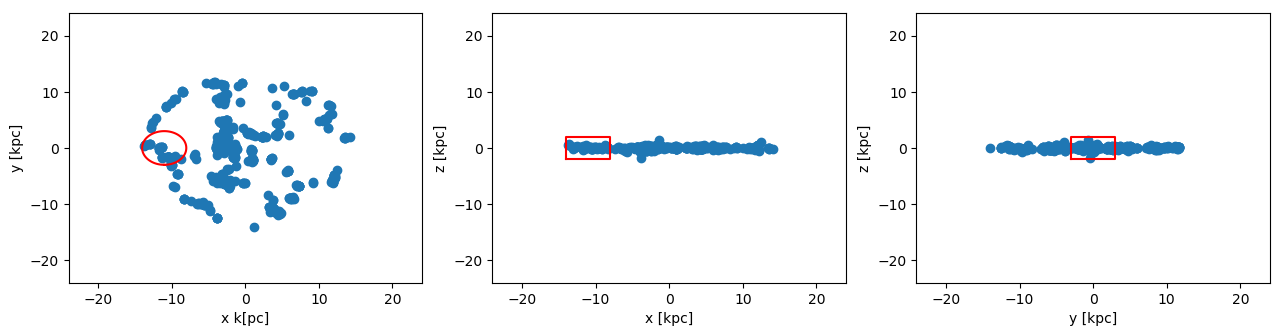

In [15]:
figure(figsize=(15.5, 3.5))
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
scatter(x,y)
plot( 3. .* sin.(theta) .-11, 3 .* cos.(theta), color="red")
xlim(rx)
ylim(ry)
xlabel("x k[pc]")
ylabel("y [kpc]")


subplot(1,3,2)
scatter(x,z)
plot([-3.,3.,3.,-3.,-3.] .-11.,[-2.,-2.,2.,2.,-2.], color="red")
xlim(rx)
ylim(rz)
xlabel("x [kpc]")
ylabel("z [kpc]")


subplot(1,3,3)
scatter(y,z)
plot([-3.,3.,3.,-3.,-3.],[-2.,-2.,2.,2.,-2.], color="red")
xlim(ry)
ylim(rz)
xlabel("y [kpc]")
ylabel("z [kpc]");

#### Cylindrical Region: Cutout the data assigned to the object *clumps*
Select the ranges of the cylinder in the unit "kpc", relative to the given center [13., 24., 24.]. The height refers to both z-directions from the plane.

In [16]:
clumps_subregion = subregion( clumps, :cylinder,
                                        radius=3., 
                                        height=2.,
                                        range_unit=:kpc, 
                                        center=[(24. -11.), :bc, :bc]); # direction=:z, by default

[Mera]: 2020-01-28T17:57:18.839

center: [0.2708333, 0.5, 0.5] ==> [13.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2083333 :: 0.3333333  	==> 10.0 [kpc] :: 16.0 [kpc]
ymin::ymax: 0.4375 :: 0.5625  	==> 21.0 [kpc] :: 27.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Radius: 3.0 [kpc]
Height: 2.0 [kpc]
Memory used for data table :5.24609375 KB
-------------------------------------------------------



Extract the the clump positions of the subregion and the extent of the full box:

In [17]:
x, y, z    = getpositions(clumps_subregion, :kpc, center=[:boxcenter])
rx, ry, rz = getextent(clumps, :kpc, center=[:boxcenter]);

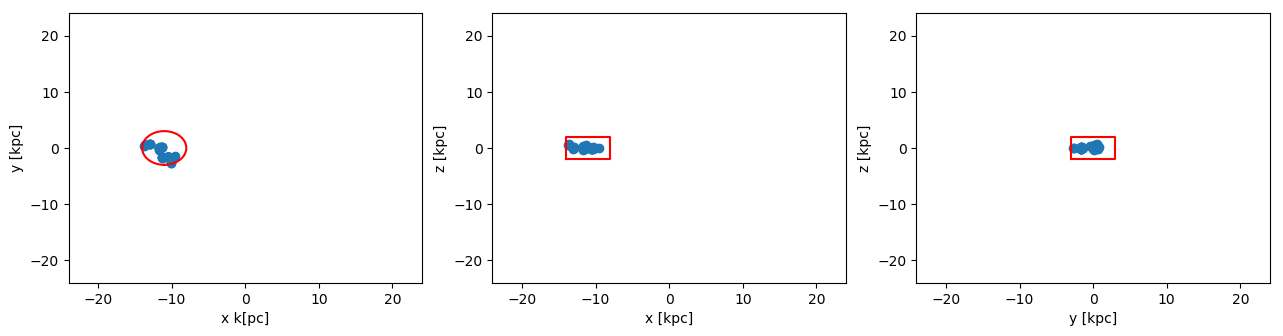

In [18]:
figure(figsize=(15.5, 3.5))
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
scatter(x,y)
plot( 3. .* sin.(theta) .-11, 3 .* cos.(theta), color="red")
xlim(rx)
ylim(ry)
xlabel("x k[pc]")
ylabel("y [kpc]")


subplot(1,3,2)
scatter(x,z)
plot([-3.,3.,3.,-3.,-3.] .-11.,[-2.,-2.,2.,2.,-2.], color="red")
xlim(rx)
ylim(rz)
xlabel("x [kpc]")
ylabel("z [kpc]")


subplot(1,3,3)
scatter(y,z)
plot([-3.,3.,3.,-3.,-3.],[-2.,-2.,2.,2.,-2.], color="red")
xlim(ry)
ylim(rz)
xlabel("y [kpc]")
ylabel("z [kpc]");

#### Cylindrical Region: Scatter-Plot of the selected data range with respect to the center of the sub-region:

In [19]:
x, y, z    = getpositions(clumps_subregion, :kpc,
                            center=[ (24. -11.), :bc, :bc], 
                            center_unit=:kpc);
rx_sub, ry_sub, rz_sub = getextent(clumps_subregion, :kpc,
                                    center=[ (24. -11.), :bc, :bc], 
                                    center_unit=:kpc);

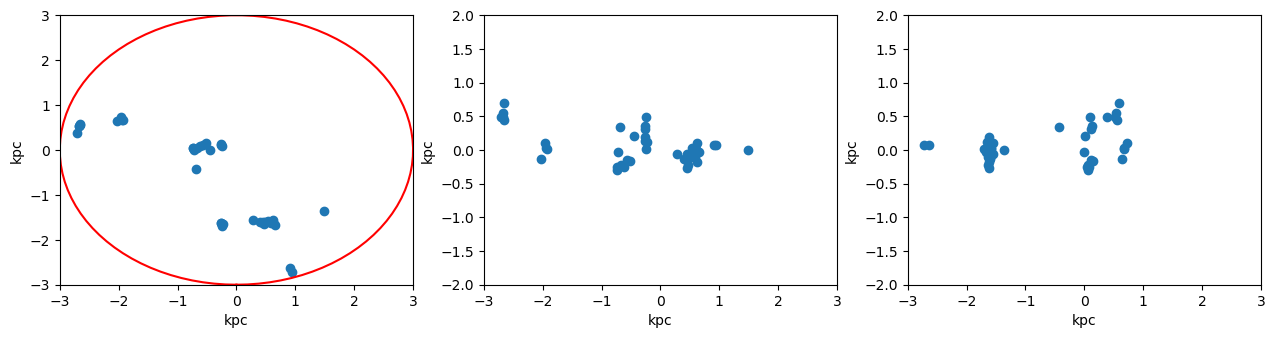

In [20]:
figure(figsize=(15.5, 3.5))
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
scatter(x,y)
plot( 3. .* sin.(theta), 3 .* cos.(theta), color="red")
xlim(rx_sub)
ylim(ry_sub)
xlabel("kpc")
ylabel("kpc")


subplot(1,3,2)
scatter(x,z)
xlim(rx_sub)
ylim(rz_sub)
xlabel("kpc")
ylabel("kpc")


subplot(1,3,3)
scatter(y,z)
xlim(ry_sub)
ylim(rz_sub)
xlabel("kpc")
ylabel("kpc");

#### Cylindrical Region: Get the data outside of the selected region (inverse selection):

In [21]:
clumps_subregion = subregion( clumps, :cylinder,
                                        radius=3., 
                                        height=2.,
                                        range_unit=:kpc, 
                                        center=[ (24. -11.),:bc,:bc],
                                        inverse=true);

[Mera]: 2020-01-28T17:59:20.713

center: [0.2708333, 0.5, 0.5] ==> [13.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2083333 :: 0.3333333  	==> 10.0 [kpc] :: 16.0 [kpc]
ymin::ymax: 0.4375 :: 0.5625  	==> 21.0 [kpc] :: 27.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Radius: 3.0 [kpc]
Height: 2.0 [kpc]
Memory used for data table :57.93359375 KB
-------------------------------------------------------



In [22]:
x, y, z    = getpositions(clumps_subregion, :kpc, center=[:boxcenter]);
rx_sub, ry_sub, rz_sub = getextent(clumps_subregion, :kpc, center=[:boxcenter]);

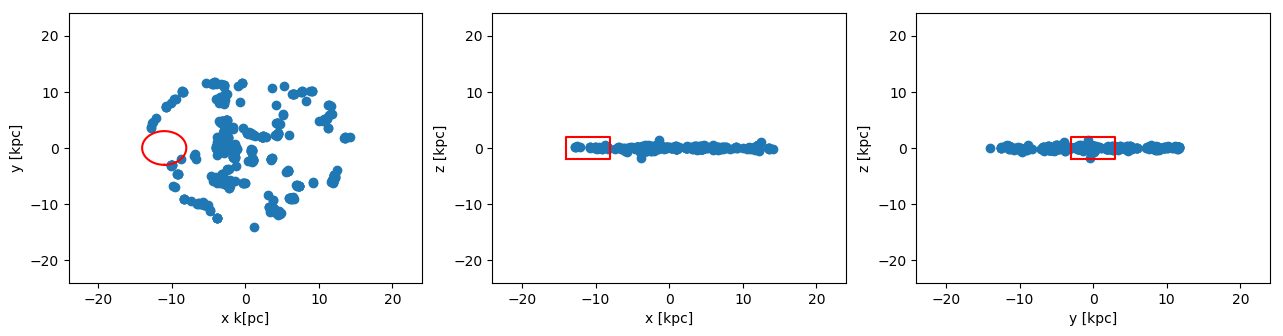

In [23]:
figure(figsize=(15.5, 3.5))
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
scatter(x,y)
plot( 3. .* sin.(theta) .-11, 3 .* cos.(theta), color="red")
xlim(rx)
ylim(ry)
xlabel("x k[pc]")
ylabel("y [kpc]")


subplot(1,3,2)
scatter(x,z)
plot([-3.,3.,3.,-3.,-3.] .-11.,[-2.,-2.,2.,2.,-2.], color="red")
xlim(rx)
ylim(rz)
xlabel("x [kpc]")
ylabel("z [kpc]")


subplot(1,3,3)
scatter(y,z)
plot([-3.,3.,3.,-3.,-3.],[-2.,-2.,2.,2.,-2.], color="red")
xlim(ry)
ylim(rz)
xlabel("y [kpc]")
ylabel("z [kpc]");

## Spherical Region

Extract the the clump positions and the extent of the full box:

In [24]:
clumps  = getclumps(info);
x, y, z = getpositions(clumps, :kpc, center=[:boxcenter]);
rx, ry, rz = getextent(clumps, :kpc, center=[:boxcenter]);

[Mera]: Get clump data: 2020-01-28T18:00:05.767

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]

Read 12 colums: 
Symbol[:index, :lev, :parent, :ncell, :peak_x, :peak_y, :peak_z, Symbol("rho-"), Symbol("rho+"), :rho_av, :mass_cl, :relevance]
Memory used for data table :61.77734375 KB
-------------------------------------------------------



#### The red lines show the region that we want to cut-out as a sub-region from the full data:

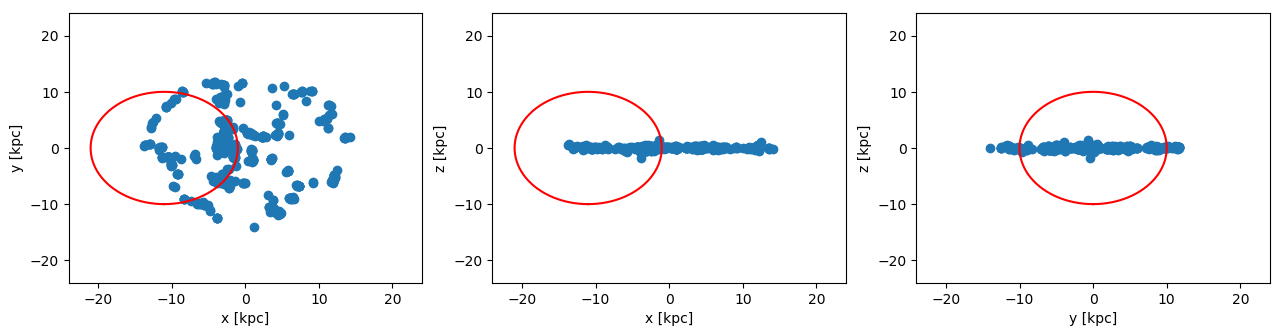

PyObject Text(871.9411764705884, 0.5, 'z [kpc]')

In [25]:
figure(figsize=(15.5, 3.5))

theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
scatter(x,y)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlim(rx)
ylim(ry)
xlabel("x [kpc]")
ylabel("y [kpc]")


subplot(1,3,2)
scatter(x,z)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlim(rx)
ylim(rz)
xlabel("x [kpc]")
ylabel("z [kpc]")


subplot(1,3,3)
scatter(y,z)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
xlim(ry)
ylim(rz)
xlabel("y [kpc]")
ylabel("z [kpc]")

#### Spherical Region: Cutout the data assigned to the object *clumps*
Select the radius of the sphere in the unit "kpc", relative to the given center [13., 24., 24.]:

In [26]:
clumps_subregion = subregion( clumps, :sphere,
                                     radius=10.,
                                     range_unit=:kpc, 
                                     center=[ (24. -11.),:bc, :bc]);

[Mera]: 2020-01-28T18:00:14.825

center: [0.2708333, 0.5, 0.5] ==> [13.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.0625 :: 0.4791667  	==> 3.0 [kpc] :: 23.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]

Radius: 10.0 [kpc]
Memory used for data table :28.68359375 KB
-------------------------------------------------------



In [30]:
x, y, z    = getpositions(clumps_subregion, :kpc, center=[:boxcenter]); # subregion
rx, ry, rz = getextent(clumps, :kpc, center=[:boxcenter]); # full box

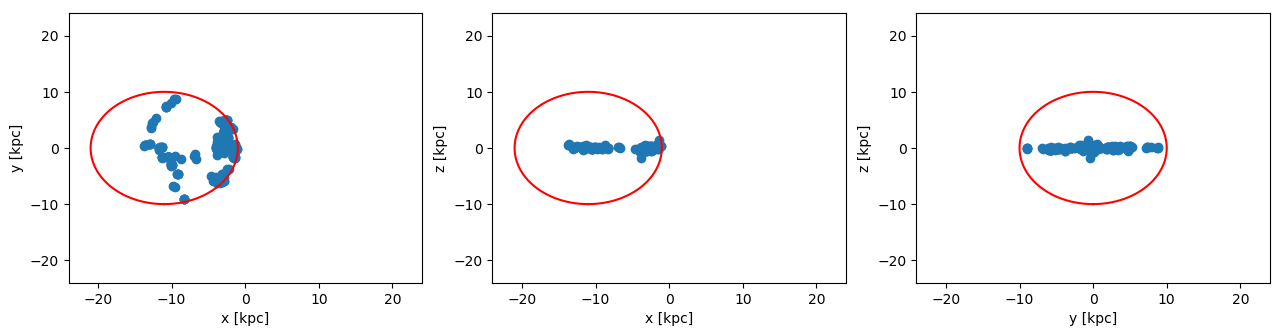

In [31]:
figure(figsize=(15.5, 3.5))

theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
scatter(x,y)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlim(rx)
ylim(ry)
xlabel("x [kpc]")
ylabel("y [kpc]")


subplot(1,3,2)
scatter(x,z)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlim(rx)
ylim(rz)
xlabel("x [kpc]")
ylabel("z [kpc]")


subplot(1,3,3)
scatter(y,z)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
xlim(ry)
ylim(rz)
xlabel("y [kpc]")
ylabel("z [kpc]");

#### Spherical Region: Scatter-Plot of the selected data range with respect to the center of the sub-region:

In [32]:
x, y, z    = getpositions(clumps_subregion, :kpc, 
                            center=[ (24. -11.), :bc, :bc], 
                            center_unit=:kpc); # subregion
rx_sub, ry_sub, rz_sub = getextent(clumps_subregion, :kpc, 
                                    center=[(24. -11.), :bc, :bc], 
                                    center_unit=:kpc); # subregion

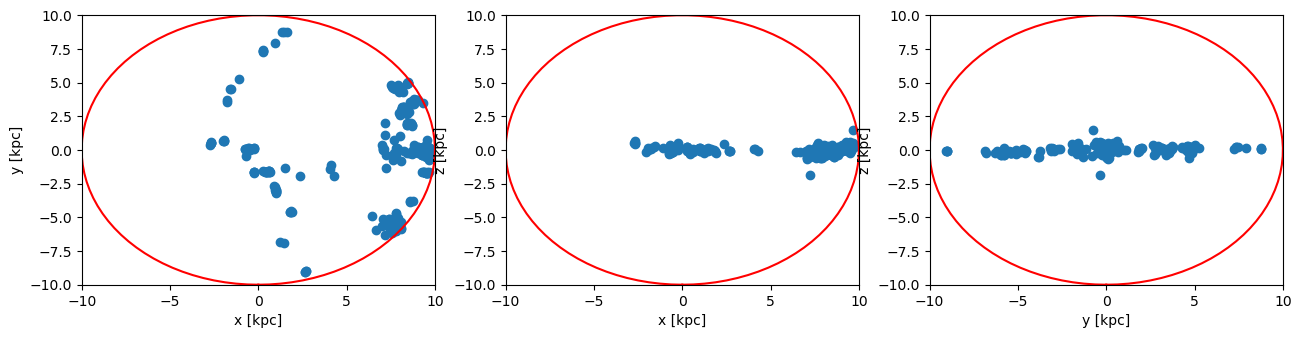

In [33]:
figure(figsize=(15.5, 3.5))
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
scatter(x,y)
plot( 10. .* sin.(theta), 10 .* cos.(theta), color="red")
xlim(rx_sub)
ylim(ry_sub)
xlabel("x [kpc]")
ylabel("y [kpc]")


subplot(1,3,2)
scatter(x,z)
plot( 10. .* sin.(theta), 10 .* cos.(theta), color="red")
xlim(rx_sub)
ylim(rz_sub)
xlabel("x [kpc]")
ylabel("z [kpc]")


subplot(1,3,3)
scatter(y,z)
plot( 10. .* sin.(theta), 10 .* cos.(theta), color="red")
xlim(ry_sub)
ylim(rz_sub)
xlabel("y [kpc]")
ylabel("z [kpc]");

#### Spherical Region: Get the data outside of the selected region (inverse selection):

In [34]:
clumps_subregion = subregion( clumps, :sphere,
                                     radius=10.,
                                     range_unit=:kpc, 
                                     center=[ (24. -11.),:bc,:bc],
                                     inverse=true);

[Mera]: 2020-01-28T18:01:43.214

center: [0.2708333, 0.5, 0.5] ==> [13.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.0625 :: 0.4791667  	==> 3.0 [kpc] :: 23.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]

Radius: 10.0 [kpc]
Memory used for data table :34.49609375 KB
-------------------------------------------------------



In [36]:
x, y, z    = getpositions(clumps_subregion, :kpc, center=[:boxcenter]);
rx_sub, ry_sub, rz_sub = getextent(clumps_subregion, :kpc, center=[:boxcenter]);

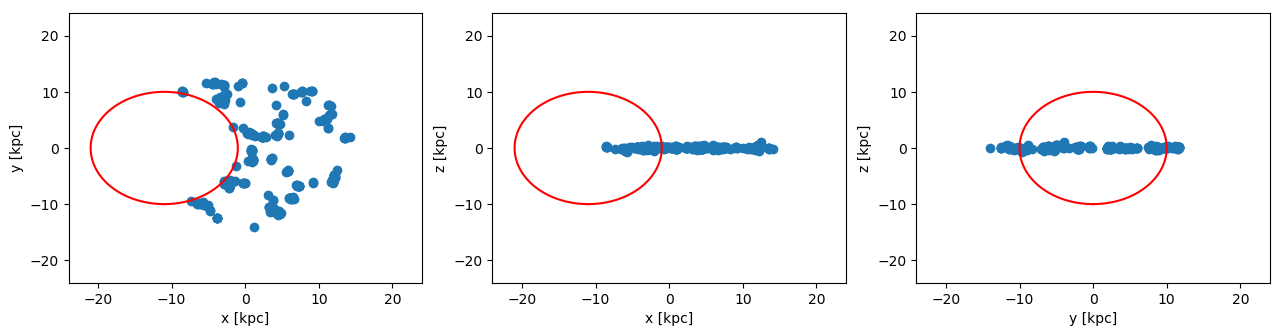

PyObject Text(871.9411764705884, 0.5, 'z [kpc]')

In [37]:
figure(figsize=(15.5, 3.5))

theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
scatter(x,y)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlim(rx)
ylim(ry)
xlabel("x [kpc]")
ylabel("y [kpc]")


subplot(1,3,2)
scatter(x,z)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlim(rx)
ylim(rz)
xlabel("x [kpc]")
ylabel("z [kpc]")


subplot(1,3,3)
scatter(y,z)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
xlim(ry)
ylim(rz)
xlabel("y [kpc]")
ylabel("z [kpc]")

## Combined/Nested/Shell Sub-Regions

#### The sub-region functions can be used in any combination with each other! (Combined with overlapping ranges or nested)

## Cylindrical Shell

Extract the the clump positions and the extent of the full box:

In [38]:
clumps = getclumps(info);
x, y, z = getpositions(clumps, :kpc, center=[:boxcenter]);
rx, ry, rz = getextent(clumps, :kpc, center=[:boxcenter]);

[Mera]: Get clump data: 2020-01-28T18:02:53.281

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]

Read 12 colums: 
Symbol[:index, :lev, :parent, :ncell, :peak_x, :peak_y, :peak_z, Symbol("rho-"), Symbol("rho+"), :rho_av, :mass_cl, :relevance]
Memory used for data table :61.77734375 KB
-------------------------------------------------------



#### The red lines show the shell that we want to cut-out as a sub-region from the full data:

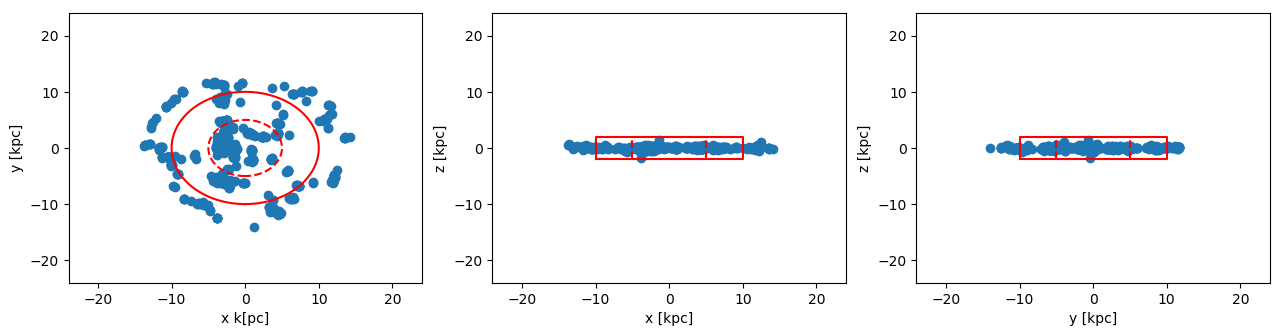

In [39]:
figure(figsize=(15.5, 3.5))
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
scatter(x,y)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlim(rx)
ylim(ry)
xlabel("x k[pc]")
ylabel("y [kpc]")


subplot(1,3,2)
scatter(x,z)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlim(rx)
ylim(rz)
xlabel("x [kpc]")
ylabel("z [kpc]")


subplot(1,3,3)
scatter(y,z)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red",ls = "--")
xlim(ry)
ylim(rz)
xlabel("y [kpc]")
ylabel("z [kpc]");

#### Cylindrical Shell: 
Pass the height of the cylinder and the inner/outer radius of the shell in the unit "kpc", relative to the box center [24., 24., 24.]:

In [2]:
clumps_subregion = shellregion( clumps, :cylinder,
                                         radius=[5.,10.], 
                                         height=2., 
                                         range_unit=:kpc, 
                                         center=[:boxcenter]);

[Mera]: 2020-01-28T18:19:44.671

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Inner radius: 5.0 [kpc]
Outer radius: 10.0 [kpc]
Radius diff: 5.0 [kpc]
Height: 2.0 [kpc]
Memory used for data table :18.55859375 KB
-------------------------------------------------------



In [3]:
x, y, z    = getpositions(clumps_subregion, :kpc, center=[:boxcenter]); # shellregion
rx, ry, rz = getextent(clumps, :kpc, center=[:boxcenter]); # full box

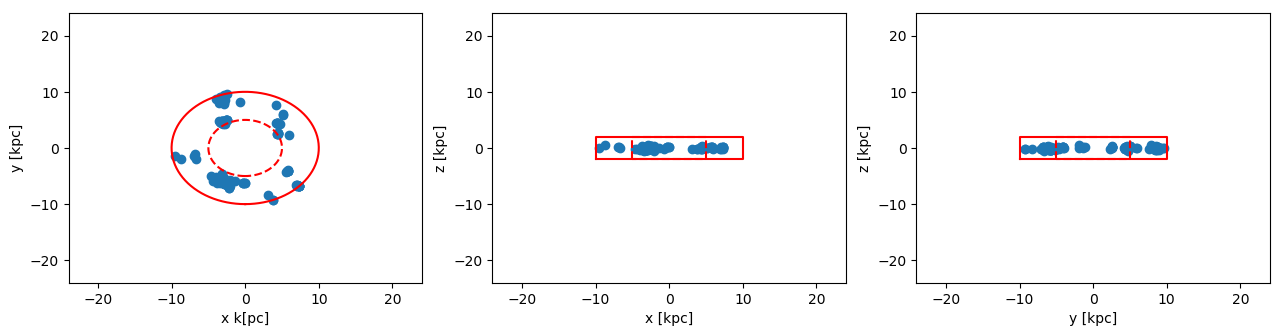

In [4]:
figure(figsize=(15.5, 3.5))
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
scatter(x,y)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlim(rx)
ylim(ry)
xlabel("x k[pc]")
ylabel("y [kpc]")


subplot(1,3,2)
scatter(x,z)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlim(rx)
ylim(rz)
xlabel("x [kpc]")
ylabel("z [kpc]")


subplot(1,3,3)
scatter(y,z)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlim(ry)
ylim(rz)
xlabel("y [kpc]")
ylabel("z [kpc]");

#### Cylindrical Shell: Get the data outside of the selected shell-region (inverse selection):

In [5]:
clumps_subregion = shellregion( clumps, :cylinder,
                                         radius=[5.,10.], 
                                         height=2., 
                                         range_unit=:kpc, 
                                         center=[:boxcenter],
                                         inverse=true);

[Mera]: 2020-01-28T18:20:19.757

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Inner radius: 5.0 [kpc]
Outer radius: 10.0 [kpc]
Radius diff: 5.0 [kpc]
Height: 2.0 [kpc]
Memory used for data table :44.62109375 KB
-------------------------------------------------------



In [6]:
x, y, z    = getpositions(clumps_subregion, :kpc, center=[:boxcenter]); # shellregion
rx, ry, rz = getextent(clumps, :kpc, center=[:boxcenter]); # full box

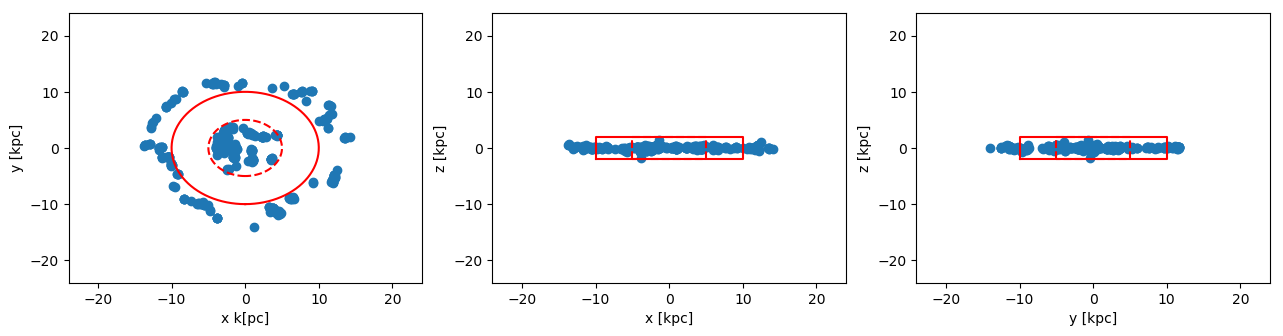

In [7]:
figure(figsize=(15.5, 3.5))
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
scatter(x,y)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlim(rx)
ylim(ry)
xlabel("x k[pc]")
ylabel("y [kpc]")


subplot(1,3,2)
scatter(x,z)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlim(rx)
ylim(rz)
xlabel("x [kpc]")
ylabel("z [kpc]")


subplot(1,3,3)
scatter(y,z)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlim(ry)
ylim(rz)
xlabel("y [kpc]")
ylabel("z [kpc]");

## Spherical Shell

Extract the the clump positions and the extent of the full box:

In [8]:
clumps  = getclumps(info);
x, y, z = getpositions(clumps, :kpc, center=[:boxcenter]);
rx, ry, rz = getextent(clumps, :kpc, center=[:boxcenter]);

[Mera]: Get clump data: 2020-01-28T18:21:03.383

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]

Read 12 colums: 
Symbol[:index, :lev, :parent, :ncell, :peak_x, :peak_y, :peak_z, Symbol("rho-"), Symbol("rho+"), :rho_av, :mass_cl, :relevance]
Memory used for data table :61.77734375 KB
-------------------------------------------------------



#### The red lines show the shell that we want to cut-out as a sub-region from the full data:

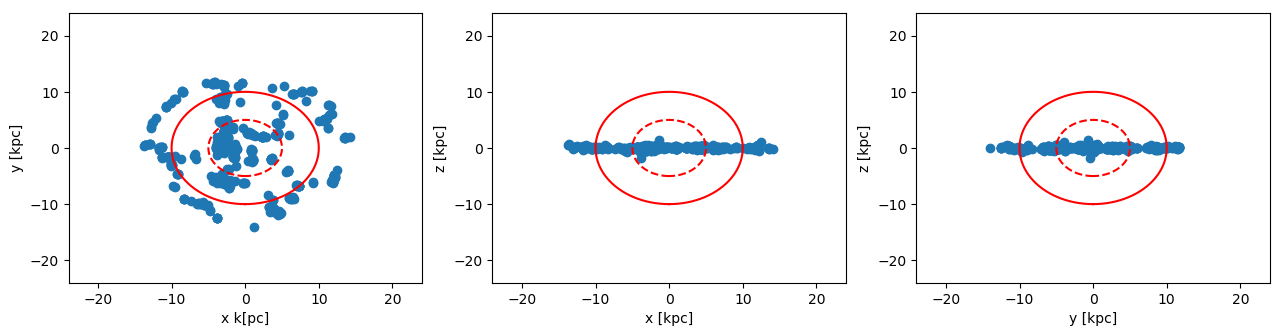

In [9]:
figure(figsize=(15.5, 3.5))
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
scatter(x,y)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlim(rx)
ylim(ry)
xlabel("x k[pc]")
ylabel("y [kpc]")


subplot(1,3,2)
scatter(x,z)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlim(rx)
ylim(rz)
xlabel("x [kpc]")
ylabel("z [kpc]")


subplot(1,3,3)
scatter(y,z)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlim(ry)
ylim(rz)
xlabel("y [kpc]")
ylabel("z [kpc]");

#### Spherical Shell: 
Select the inner and outer radius of the spherical shell in unit "kpc", relative to the box center [24., 24., 24.]:

In [10]:
clumps_subregion = shellregion( clumps, :sphere,
                                radius=[5.,10.],
                                range_unit=:kpc, 
                                center=[:boxcenter]);

[Mera]: 2020-01-28T18:21:11.686

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]

Inner radius: 5.0 [kpc]
Outer radius: 10.0 [kpc]
Radius diff: 5.0 [kpc]
Memory used for data table :18.55859375 KB
-------------------------------------------------------



In [11]:
x, y, z    = getpositions(clumps_subregion, :kpc, center=[:boxcenter]); # shellregion
rx, ry, rz = getextent(clumps, :kpc, center=[:boxcenter]); # full box

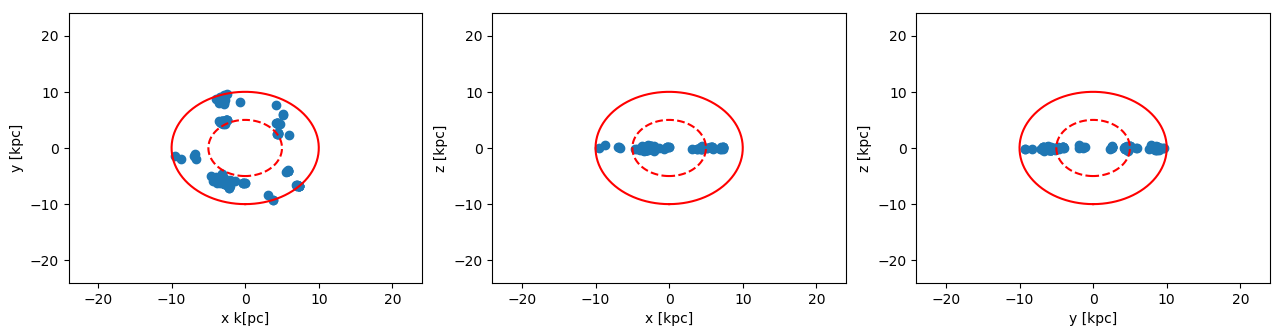

In [12]:
figure(figsize=(15.5, 3.5))
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
scatter(x,y)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlim(rx)
ylim(ry)
xlabel("x k[pc]")
ylabel("y [kpc]")


subplot(1,3,2)
scatter(x,z)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlim(rx)
ylim(rz)
xlabel("x [kpc]")
ylabel("z [kpc]")


subplot(1,3,3)
scatter(y,z)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red",  ls="--")
xlim(ry)
ylim(rz)
xlabel("y [kpc]")
ylabel("z [kpc]");

#### Spherical Shell: Get the data outside of the selected shell-region (inverse selection):

In [13]:
clumps_subregion = shellregion( clumps, :sphere,
                                radius=[5.,10.],
                                range_unit=:kpc, 
                                center=[:boxcenter],
                                inverse=true);

[Mera]: 2020-01-28T18:21:45.296

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]

Inner radius: 5.0 [kpc]
Outer radius: 10.0 [kpc]
Radius diff: 5.0 [kpc]
Memory used for data table :44.62109375 KB
-------------------------------------------------------



In [14]:
x, y, z    = getpositions(clumps_subregion, :kpc, center=[:boxcenter]); # shellregion
rx, ry, rz = getextent(clumps, :kpc, center=[:boxcenter] ); # full box

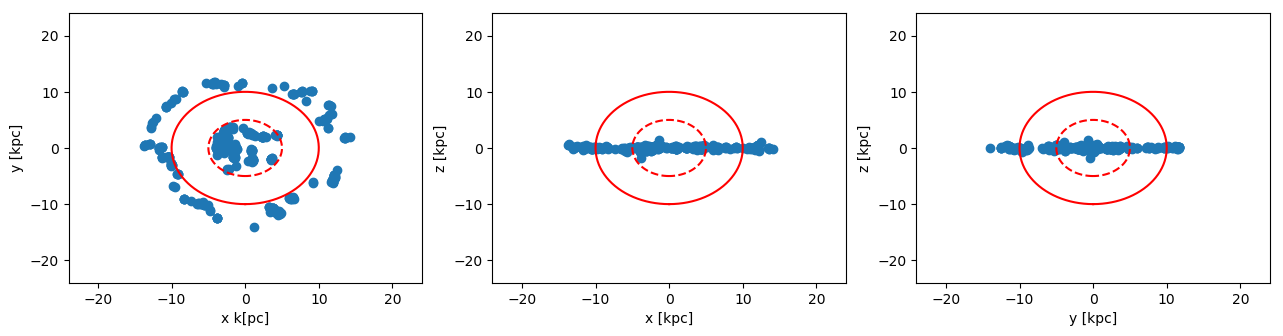

In [15]:
figure(figsize=(15.5, 3.5))
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
scatter(x,y)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlim(rx)
ylim(ry)
xlabel("x k[pc]")
ylabel("y [kpc]")


subplot(1,3,2)
scatter(x,z)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlim(rx)
ylim(rz)
xlabel("x [kpc]")
ylabel("z [kpc]")


subplot(1,3,3)
scatter(y,z)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlim(ry)
ylim(rz)
xlabel("y [kpc]")
ylabel("z [kpc]");